In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


In [19]:
def plot3d(x, y, z):
    l = int(np.sqrt(x.shape[0]))
    x1 = x.reshape(l,l)
    y1 = y.reshape(l,l)
    z1 = z.reshape(l,l)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(x1, y1, z1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    plt.show()
   # ax.set_zlim(-1.01, 1.01)

    X1 = X.reshape(-1,1)
    Y1 = Y.reshape(-1,1)
    Z1 = Z.reshape(-1,1)

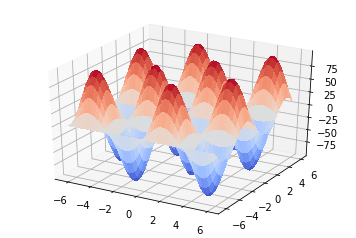

In [30]:
X = np.arange(-2*np.pi, 2*np.pi, 0.3)
Y = np.arange(-2*np.pi, 2*np.pi, 0.3)
X, Y = np.meshgrid(X, Y)
Z = 100*np.sin(X)*np.sin(Y) #+ np.random.normal(scale=.05, size=X.shape)

# fig = plt.figure()
# ax = fig.gca(projection='3d')

# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

#plt.show()

In [31]:
X.shape

(42, 42)

In [33]:
X1 = X.reshape(-1,1)
Y1 = Y.reshape(-1,1)
Z1 = Z.reshape(-1,1)
X1.shape

(1764, 1)

In [34]:
np.random.normal(scale=1, size=(100,100))

array([[-0.22854169,  0.66396883,  0.40774705, ...,  0.62231594,
        -0.08085137,  1.19710789],
       [ 0.49932672, -1.49576991,  0.58645784, ..., -0.35277046,
        -0.01832207, -0.60559279],
       [ 1.53727659,  1.40808082,  0.30047268, ..., -0.85702513,
        -0.90287637, -0.71640775],
       ..., 
       [ 0.36421889,  0.56534776, -0.37701642, ..., -0.80117978,
        -0.91098403,  2.33333952],
       [-2.94003223, -1.79559363,  0.83145287, ..., -0.13420346,
        -0.29411597, -0.58647811],
       [-1.10815408, -1.67152748, -1.16811848, ..., -1.22741032,
         0.13221381,  0.00688042]])

In [35]:
import tensorflow as tf

In [36]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(1, dtype=tf.float32)
node1, node2

(<tf.Tensor 'Const_2:0' shape=() dtype=float32>,
 <tf.Tensor 'Const_3:0' shape=() dtype=float32>)

In [37]:
sess = tf.Session()
sess.run([node1, node2, tf.add(node1, node2)])

[3.0, 1.0, 4.0]

In [38]:
tf.VERSION

'1.4.0'

In [39]:
sess.partial_run

<bound method Session.partial_run of <tensorflow.python.client.session.Session object at 0x181b2e3550>>

In [40]:
import tensorflow as tf

In [41]:
input_fn = tf.estimator.inputs.numpy_input_fn({"X": X1, "Y":Y1}, y=Z1, batch_size=5, num_epochs=100, shuffle=True)
predict_input_fn = tf.estimator.inputs.numpy_input_fn({"X": X1, "Y":Y1}, y=Z1, batch_size=5, num_epochs=1, shuffle=False)

In [42]:
def model_fn_with_dense(features, labels, mode, params={}):
    p = params.get("p", 1)
    
    # b - batch size
    X = features['X'] # b x 1
    Y = features['Y'] # b x 1
    
    # labels -- b x 1
    
    inputs = tf.concat([X,Y], axis = 1) # b x 2
    
    out1 = tf.layers.dense(inputs=inputs, activation=tf.nn.relu, units=p)
    out2 = tf.layers.dense(inputs=out1, units=1)
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode = mode,
            predictions = out2,
            loss = None,
            train_op = None
        )
    loss = tf.losses.mean_squared_error(labels, out2)
    learning_rate = 1e-5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    global_step = tf.train.get_global_step()
    train_op = tf.group(optimizer, tf.assign_add(global_step, 1))
    return tf.estimator.EstimatorSpec(
        mode = mode,
        predictions = out2,
        loss = loss,
        train_op = train_op
    )

In [43]:
estimator = tf.estimator.Estimator(model_fn=model_fn_with_dense, params={"p": 100})

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x181b44f3d0>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpEbfcPQ', '_save_summary_steps': 100}


In [44]:
estimator.train(input_fn=input_fn)
Zgen = estimator.predict(input_fn=predict_input_fn)
Zout = np.array([i[0] for i in Zgen]).reshape(-1,1)
estimator.evaluate(input_fn=predict_input_fn)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpEbfcPQ/model.ckpt.
INFO:tensorflow:loss = 3297.94, step = 1
INFO:tensorflow:global_step/sec: 937.593
INFO:tensorflow:loss = 2343.83, step = 101 (0.109 sec)
INFO:tensorflow:global_step/sec: 1092.63
INFO:tensorflow:loss = 2969.48, step = 201 (0.092 sec)
INFO:tensorflow:global_step/sec: 954.427
INFO:tensorflow:loss = 4712.82, step = 301 (0.106 sec)
INFO:tensorflow:global_step/sec: 1046.09
INFO:tensorflow:loss = 2416.92, step = 401 (0.093 sec)
INFO:tensorflow:global_step/sec: 1089.75
INFO:tensorflow:loss = 5600.13, step = 501 (0.091 sec)
INFO:tensorflow:global_step/sec: 904.151
INFO:tensorflow:loss = 3540.71, step = 601 (0.111 sec)
INFO:tensorflow:global_step/sec: 1110.25
INFO:tensorflow:loss = 322.111, step = 701 (0.090 sec)
INFO:tensorflow:global_step/sec: 972.906
INFO:tensorflow:loss = 1894.07, step = 801 (0.103 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 1236.28
INFO:tensorflow:loss = 1708.65, step = 8401 (0.081 sec)
INFO:tensorflow:global_step/sec: 1256.25
INFO:tensorflow:loss = 1711.67, step = 8501 (0.079 sec)
INFO:tensorflow:global_step/sec: 1285.58
INFO:tensorflow:loss = 2059.4, step = 8601 (0.078 sec)
INFO:tensorflow:global_step/sec: 1338.33
INFO:tensorflow:loss = 3199.43, step = 8701 (0.075 sec)
INFO:tensorflow:global_step/sec: 1325.87
INFO:tensorflow:loss = 3728.25, step = 8801 (0.075 sec)
INFO:tensorflow:global_step/sec: 1329.28
INFO:tensorflow:loss = 2184.52, step = 8901 (0.075 sec)
INFO:tensorflow:global_step/sec: 1293.96
INFO:tensorflow:loss = 2325.4, step = 9001 (0.077 sec)
INFO:tensorflow:global_step/sec: 1065.9
INFO:tensorflow:loss = 1750.12, step = 9101 (0.094 sec)
INFO:tensorflow:global_step/sec: 848.659
INFO:tensorflow:loss = 646.355, step = 9201 (0.118 sec)
INFO:tensorflow:global_step/sec: 893.822
INFO:tensorflow:loss = 2258.14, step = 9301 (0.113 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 1181.68
INFO:tensorflow:loss = 3883.42, step = 16801 (0.085 sec)
INFO:tensorflow:global_step/sec: 1306.4
INFO:tensorflow:loss = 2738.44, step = 16901 (0.076 sec)
INFO:tensorflow:global_step/sec: 1350
INFO:tensorflow:loss = 2102.52, step = 17001 (0.074 sec)
INFO:tensorflow:global_step/sec: 1355.58
INFO:tensorflow:loss = 679.559, step = 17101 (0.074 sec)
INFO:tensorflow:global_step/sec: 1327
INFO:tensorflow:loss = 4037.61, step = 17201 (0.075 sec)
INFO:tensorflow:global_step/sec: 1346.47
INFO:tensorflow:loss = 4494.52, step = 17301 (0.074 sec)
INFO:tensorflow:global_step/sec: 1321.23
INFO:tensorflow:loss = 1634.4, step = 17401 (0.076 sec)
INFO:tensorflow:global_step/sec: 1310.58
INFO:tensorflow:loss = 1661.44, step = 17501 (0.076 sec)
INFO:tensorflow:global_step/sec: 1342.07
INFO:tensorflow:loss = 4978.69, step = 17601 (0.074 sec)
INFO:tensorflow:global_step/sec: 1339.77
INFO:tensorflow:loss = 602.012, step = 17701 (0.075 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 1256.44
INFO:tensorflow:loss = 579.758, step = 25201 (0.079 sec)
INFO:tensorflow:global_step/sec: 1292.99
INFO:tensorflow:loss = 1494.92, step = 25301 (0.077 sec)
INFO:tensorflow:global_step/sec: 1243.27
INFO:tensorflow:loss = 1697.13, step = 25401 (0.080 sec)
INFO:tensorflow:global_step/sec: 1262.39
INFO:tensorflow:loss = 1391.1, step = 25501 (0.079 sec)
INFO:tensorflow:global_step/sec: 1238.01
INFO:tensorflow:loss = 2285.51, step = 25601 (0.081 sec)
INFO:tensorflow:global_step/sec: 1281.03
INFO:tensorflow:loss = 1897.72, step = 25701 (0.078 sec)
INFO:tensorflow:global_step/sec: 1310.13
INFO:tensorflow:loss = 1754.41, step = 25801 (0.076 sec)
INFO:tensorflow:global_step/sec: 1242.86
INFO:tensorflow:loss = 778.291, step = 25901 (0.081 sec)
INFO:tensorflow:global_step/sec: 1249.64
INFO:tensorflow:loss = 2592.41, step = 26001 (0.080 sec)
INFO:tensorflow:global_step/sec: 1265.85
INFO:tensorflow:loss = 3249.46, step = 26101 (0.079 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 1252.88
INFO:tensorflow:loss = 1893.13, step = 33601 (0.080 sec)
INFO:tensorflow:global_step/sec: 1297.67
INFO:tensorflow:loss = 2236.07, step = 33701 (0.077 sec)
INFO:tensorflow:global_step/sec: 1324.33
INFO:tensorflow:loss = 1553.65, step = 33801 (0.076 sec)
INFO:tensorflow:global_step/sec: 1319.96
INFO:tensorflow:loss = 2610.55, step = 33901 (0.076 sec)
INFO:tensorflow:global_step/sec: 1284.47
INFO:tensorflow:loss = 1486.04, step = 34001 (0.078 sec)
INFO:tensorflow:global_step/sec: 1332.94
INFO:tensorflow:loss = 1076.64, step = 34101 (0.075 sec)
INFO:tensorflow:global_step/sec: 1293.04
INFO:tensorflow:loss = 3548.93, step = 34201 (0.077 sec)
INFO:tensorflow:global_step/sec: 1299.14
INFO:tensorflow:loss = 251.891, step = 34301 (0.077 sec)
INFO:tensorflow:global_step/sec: 1334.58
INFO:tensorflow:loss = 2601.68, step = 34401 (0.075 sec)
INFO:tensorflow:global_step/sec: 1278.61
INFO:tensorflow:loss = 3961.76, step = 34501 (0.078 sec)
INFO:tensorflow:glob

{'global_step': 35281, 'loss': 2291.7134}

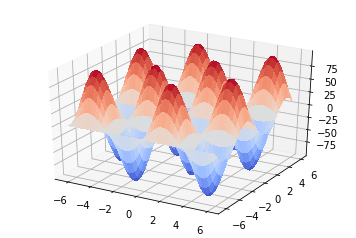

In [45]:
#plot3d(X1, Y1, Z1)

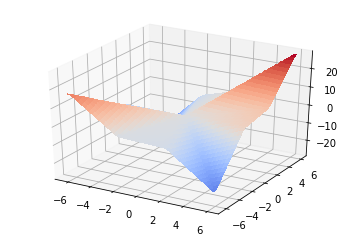

In [46]:
#plot3d(X1, Y1, Zout)

In [47]:
def model_fn_with_dense_2(features, labels, mode, params={}):
    p = params.get("p", 1)
    
    # b - batch size
    X = features['X'] # b x 1
    Y = features['Y'] # b x 1
    
    # labels -- b x 1
    
    inputs = tf.concat([X,Y], axis = 1) # b x 2
    
    out1 = tf.layers.dense(inputs=inputs, activation=tf.nn.relu, units=p)
    out2 = tf.layers.dense(inputs=out1, units=p, activation=tf.nn.relu)
    out3 = tf.layers.dense(inputs=out2, units=1)
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode = mode,
            predictions = out3,
            loss = None,
            train_op = None
        )
    loss = tf.losses.mean_squared_error(labels, out3)
    learning_rate = 1e-5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    global_step = tf.train.get_global_step()
    train_op = tf.group(optimizer, tf.assign_add(global_step, 1))
    return tf.estimator.EstimatorSpec(
        mode = mode,
        predictions = out3,
        loss = loss,
        train_op = train_op
    )

In [53]:
estimator = tf.estimator.Estimator(model_fn=model_fn_with_dense_2, params={"p": 100})
estimator.train(input_fn=input_fn)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x181b341f90>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmped0HVA', '_save_summary_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmped0HVA/model.ckpt.
INFO:tensorflow:loss = 675.015, step = 1
INFO:tensorflow:global_step/sec: 891.337
INFO:tensorflow:loss = 3936.79, step = 101 (0.115 sec)
INFO:tensorflow:global_step/sec: 1080
INFO:tensorflow:loss = 2234.21, step = 201 (0

INFO:tensorflow:loss = 2432.25, step = 7601 (0.086 sec)
INFO:tensorflow:global_step/sec: 1054.52
INFO:tensorflow:loss = 1379.96, step = 7701 (0.095 sec)
INFO:tensorflow:global_step/sec: 777.538
INFO:tensorflow:loss = 2648.53, step = 7801 (0.128 sec)
INFO:tensorflow:global_step/sec: 1116.94
INFO:tensorflow:loss = 3319.6, step = 7901 (0.089 sec)
INFO:tensorflow:global_step/sec: 1356.45
INFO:tensorflow:loss = 1234.01, step = 8001 (0.073 sec)
INFO:tensorflow:global_step/sec: 1376.71
INFO:tensorflow:loss = 4509.47, step = 8101 (0.073 sec)
INFO:tensorflow:global_step/sec: 1331.65
INFO:tensorflow:loss = 5209.96, step = 8201 (0.075 sec)
INFO:tensorflow:global_step/sec: 1350.67
INFO:tensorflow:loss = 2152.69, step = 8301 (0.074 sec)
INFO:tensorflow:global_step/sec: 1307.5
INFO:tensorflow:loss = 1244.01, step = 8401 (0.076 sec)
INFO:tensorflow:global_step/sec: 1187.94
INFO:tensorflow:loss = 826.538, step = 8501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1303.21
INFO:tensorflow:loss = 1903.75, 

INFO:tensorflow:global_step/sec: 1189.67
INFO:tensorflow:loss = 511.789, step = 16101 (0.084 sec)
INFO:tensorflow:global_step/sec: 1196.04
INFO:tensorflow:loss = 1427.33, step = 16201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1266.74
INFO:tensorflow:loss = 1443.32, step = 16301 (0.079 sec)
INFO:tensorflow:global_step/sec: 1283.04
INFO:tensorflow:loss = 1719.35, step = 16401 (0.078 sec)
INFO:tensorflow:global_step/sec: 1282.28
INFO:tensorflow:loss = 1627.13, step = 16501 (0.078 sec)
INFO:tensorflow:global_step/sec: 1278.9
INFO:tensorflow:loss = 598.299, step = 16601 (0.078 sec)
INFO:tensorflow:global_step/sec: 1231.81
INFO:tensorflow:loss = 2096.71, step = 16701 (0.081 sec)
INFO:tensorflow:global_step/sec: 1247.24
INFO:tensorflow:loss = 806.443, step = 16801 (0.080 sec)
INFO:tensorflow:global_step/sec: 1226.36
INFO:tensorflow:loss = 3546.8, step = 16901 (0.082 sec)
INFO:tensorflow:global_step/sec: 1254.47
INFO:tensorflow:loss = 855.49, step = 17001 (0.080 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 1171.76
INFO:tensorflow:loss = 1366.26, step = 24501 (0.085 sec)
INFO:tensorflow:global_step/sec: 1247.18
INFO:tensorflow:loss = 1498.25, step = 24601 (0.080 sec)
INFO:tensorflow:global_step/sec: 1277.09
INFO:tensorflow:loss = 952.211, step = 24701 (0.078 sec)
INFO:tensorflow:global_step/sec: 1277.04
INFO:tensorflow:loss = 1303.25, step = 24801 (0.078 sec)
INFO:tensorflow:global_step/sec: 1263.57
INFO:tensorflow:loss = 785.879, step = 24901 (0.079 sec)
INFO:tensorflow:global_step/sec: 1262.58
INFO:tensorflow:loss = 761.29, step = 25001 (0.079 sec)
INFO:tensorflow:global_step/sec: 1244.73
INFO:tensorflow:loss = 2810.05, step = 25101 (0.080 sec)
INFO:tensorflow:global_step/sec: 1242.42
INFO:tensorflow:loss = 620.272, step = 25201 (0.080 sec)
INFO:tensorflow:global_step/sec: 1244.73
INFO:tensorflow:loss = 1712.09, step = 25301 (0.080 sec)
INFO:tensorflow:global_step/sec: 1228.67
INFO:tensorflow:loss = 1423.3, step = 25401 (0.081 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 1025.13
INFO:tensorflow:loss = 1312.18, step = 32901 (0.098 sec)
INFO:tensorflow:global_step/sec: 1098.24
INFO:tensorflow:loss = 1211.64, step = 33001 (0.091 sec)
INFO:tensorflow:global_step/sec: 1034.36
INFO:tensorflow:loss = 1122.4, step = 33101 (0.098 sec)
INFO:tensorflow:global_step/sec: 970.892
INFO:tensorflow:loss = 642.969, step = 33201 (0.102 sec)
INFO:tensorflow:global_step/sec: 1218
INFO:tensorflow:loss = 2779.47, step = 33301 (0.082 sec)
INFO:tensorflow:global_step/sec: 1238.79
INFO:tensorflow:loss = 2112.39, step = 33401 (0.081 sec)
INFO:tensorflow:global_step/sec: 1200.88
INFO:tensorflow:loss = 1423.63, step = 33501 (0.083 sec)
INFO:tensorflow:global_step/sec: 1103.03
INFO:tensorflow:loss = 629.312, step = 33601 (0.091 sec)
INFO:tensorflow:global_step/sec: 1142.81
INFO:tensorflow:loss = 423.507, step = 33701 (0.087 sec)
INFO:tensorflow:global_step/sec: 1239.42
INFO:tensorflow:loss = 1332.89, step = 33801 (0.081 sec)
INFO:tensorflow:global_s

In [54]:
Zgen = estimator.predict(input_fn=predict_input_fn)
Zout = np.array([i[0] for i in Zgen]).reshape(-1,1)
print estimator.evaluate(input_fn=predict_input_fn)

INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmped0HVA/model.ckpt-35281
INFO:tensorflow:Starting evaluation at 2018-01-22-10:50:26
INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmped0HVA/model.ckpt-35281
INFO:tensorflow:Finished evaluation at 2018-01-22-10:50:26
INFO:tensorflow:Saving dict for global step 35281: global_step = 35281, loss = 1080.78


{'global_step': 35281, 'loss': 1080.7789}

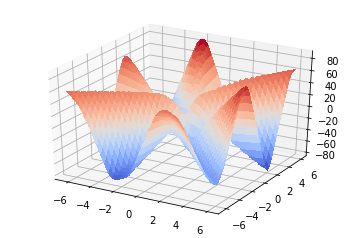

In [55]:
#plot3d(X1, Y1, Zout)

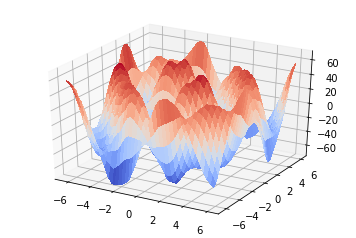

In [56]:
#plot3d(X1, Y1, Zout - Z1)